In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/kaggle/input/playground-series-s5e11/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s5e11/test.csv')

# EDA

In [4]:
data.shape

(593994, 13)

In [5]:
data.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [6]:
data.tail()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [8]:
data.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,171471.442235,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [9]:
missing_table = pd.DataFrame({
    'Missing Values': data.isna().sum(),
    'Percentage (%)': (data.isnull().mean() * 100).round(2)
})

print(missing_table.sort_values(by='Missing Values', ascending=False))

                      Missing Values  Percentage (%)
id                                 0             0.0
annual_income                      0             0.0
debt_to_income_ratio               0             0.0
credit_score                       0             0.0
loan_amount                        0             0.0
interest_rate                      0             0.0
gender                             0             0.0
marital_status                     0             0.0
education_level                    0             0.0
employment_status                  0             0.0
loan_purpose                       0             0.0
grade_subgrade                     0             0.0
loan_paid_back                     0             0.0


In [10]:
data.nunique()

id                      593994
annual_income           119728
debt_to_income_ratio       526
credit_score               399
loan_amount             111570
interest_rate             1454
gender                       3
marital_status               4
education_level              5
employment_status            5
loan_purpose                 8
grade_subgrade              30
loan_paid_back               2
dtype: int64

# Data visualisation

Target variable distribution - load payback

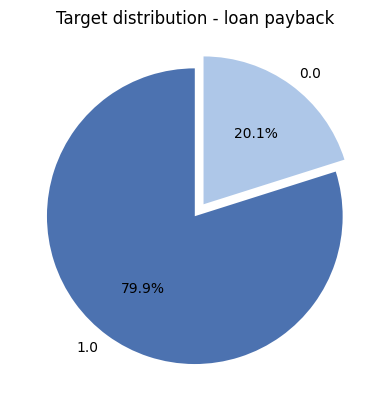

In [11]:
data['loan_paid_back'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=(0,0.1), colors=['#4c72b0', '#aec7e8'])
plt.title('Target distribution - loan payback')
plt.ylabel('')
plt.show()

Numerical columns - remove id and target

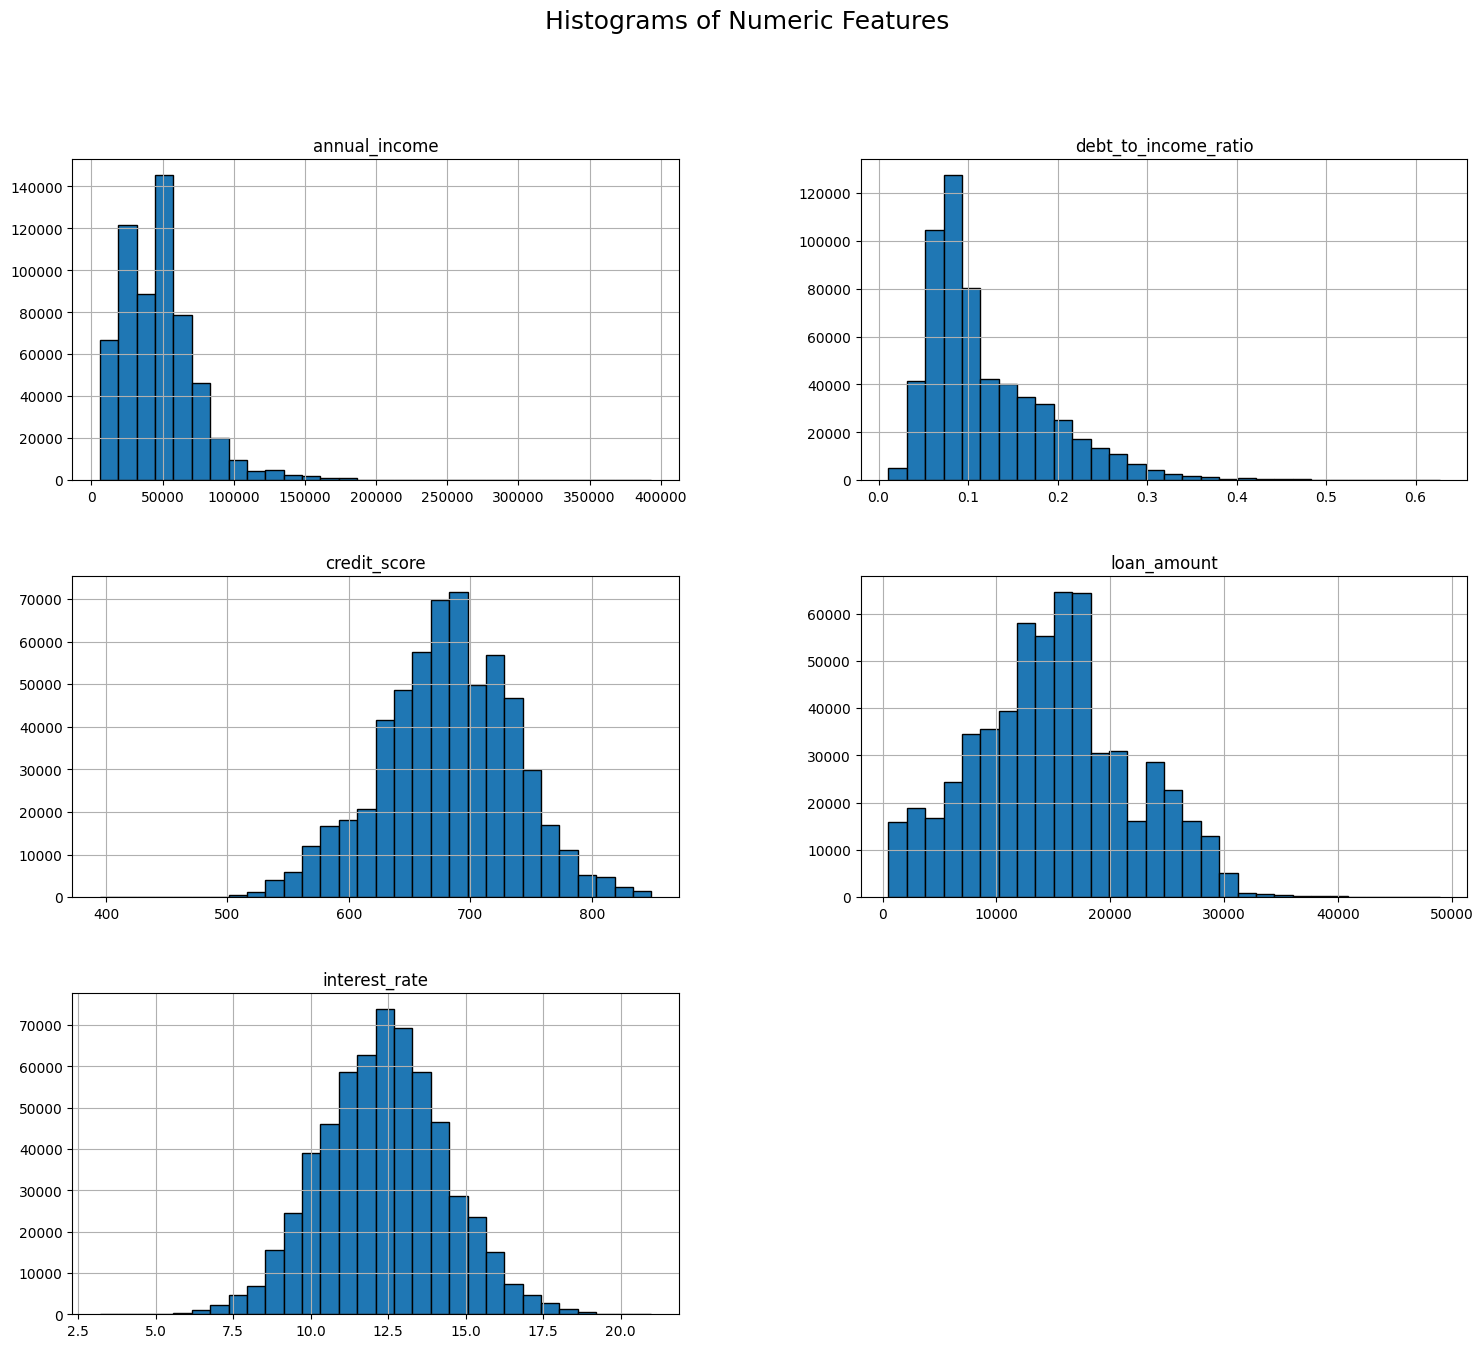

In [12]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('id')
numeric_cols.remove('loan_paid_back')

data[numeric_cols].hist(bins=30, figsize=(18, 15), edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=18)
plt.show()

Categorical columns

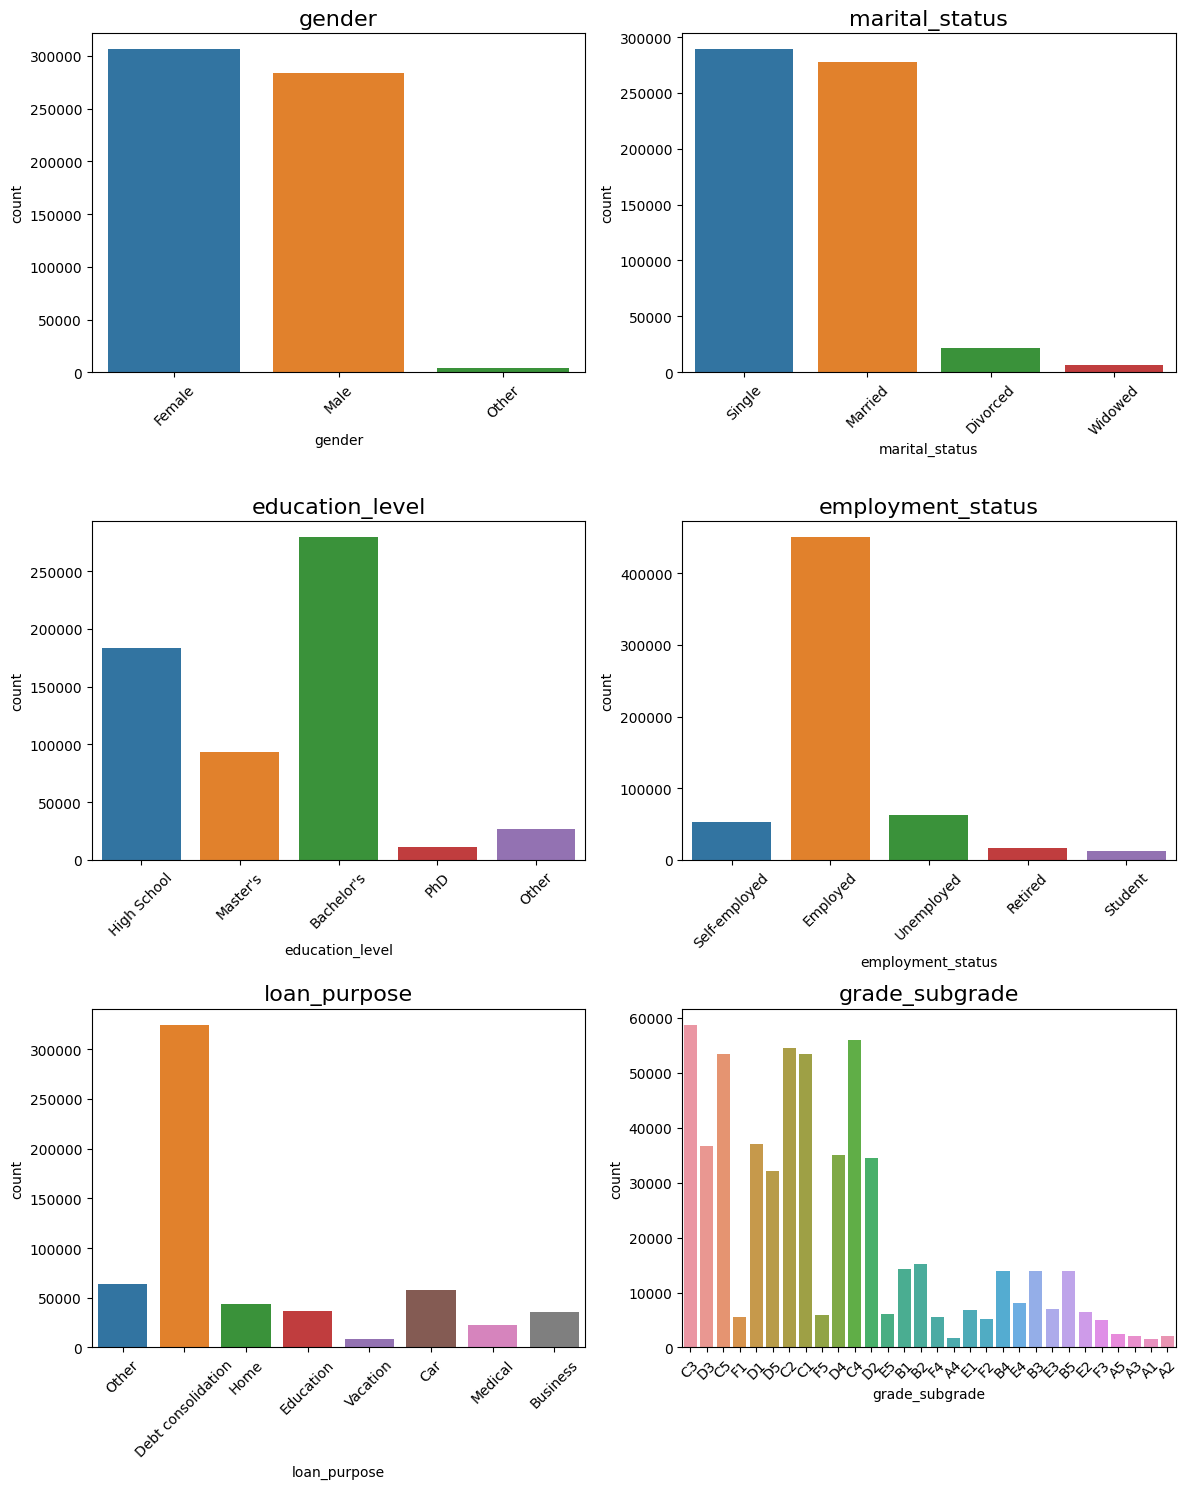

In [13]:
cat_cols = data.select_dtypes(include=['bool', 'object']).columns.tolist()

fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(col, fontsize = 16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center', fontsize = 10)


plt.tight_layout()
plt.show()

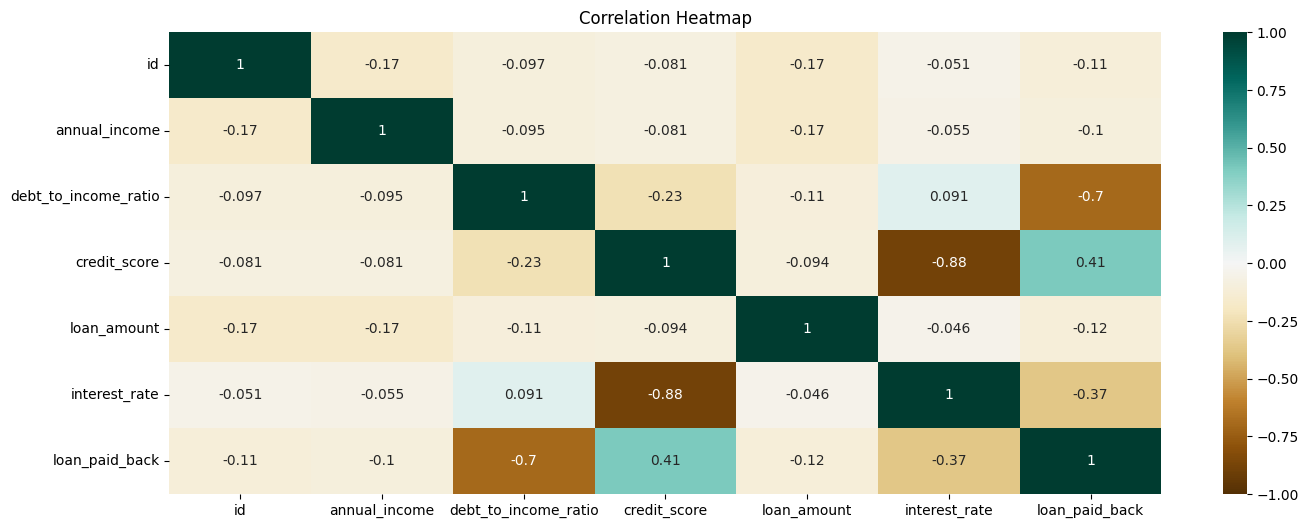

In [14]:
plt.figure(figsize=(16, 6))

data_corr = data.corr(numeric_only=True)

heatmap = sns.heatmap(data_corr.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

plt.show()

Top 5 correlated features with target

In [15]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('id')

correlations = data[numeric_cols].corr()['loan_paid_back']
correlations = correlations.drop('loan_paid_back')

top_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()

print("Top 5 features correlated with target:")
print(correlations[top_features])

Top 5 features correlated with target:
debt_to_income_ratio   -0.335680
credit_score            0.234560
interest_rate          -0.131184
annual_income           0.006326
loan_amount            -0.003762
Name: loan_paid_back, dtype: float64


Feature engineering

In [16]:
def new_features(df):
    df = df.copy()

    df["loan_to_income"] = df["loan_amount"] / (df["annual_income"] + 1)
    df["loan_burden"] = df["loan_amount"] / (df["annual_income"] + 1)
    df["income_per_credit"] = df["annual_income"] / (df["credit_score"] + 1)

    df["loan_amount_log"] = np.log1p(df["loan_amount"])
    df["annual_income_log"] = np.log1p(df["annual_income"])
    df["log_credit"] = np.log1p(df["credit_score"])

    df["annual_debt"] = df["annual_income"] * df["debt_to_income_ratio"]
    df["financial_health"] = (df["credit_score"] / 850) * (1 - df["debt_to_income_ratio"])
    df["income_efficiency"] = df["annual_income"] * (1 - df["debt_to_income_ratio"])
    df["affordability_score"] = (df["annual_income"] / 12) / (
        df["loan_amount"] * df["interest_rate"] / 1200 + 1
    )

    df["grade_letter"] = df["grade_subgrade"].str[0]
    df["grade_number"] = df["grade_subgrade"].str[1].astype(int)
    grade_map = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    df["grade_rank"] = df["grade_letter"].map(grade_map)
    df["grade_score"] = df["grade_rank"] * 10 + df["grade_number"]

    df["interest_rate_squared"] = df["interest_rate"] ** 2

    df["is_self_employed"] = (df["employment_status"] == "Self-employed").astype(int)

    return df


In [17]:
data = new_features(data)
test_data = new_features(test_data)

# Model building

In [18]:
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
X = data.drop(['id', 'loan_paid_back'], axis=1)
y = data['loan_paid_back']
test_id = test_data['id']
test_data = test_data.drop(['id'], axis=1)

In [20]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

In [21]:
lgb_params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "learning_rate": 0.01,
    "num_leaves": 45,
    "max_depth": 10,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    "min_data_in_leaf": 70,
    'min_child_samples': 20,
    'reg_alpha': 0.05,
    'reg_lambda': 0.1,
    "verbosity": -1,
    "seed": 42,
    "n_jobs": -1,
    "device": "gpu"
}

In [22]:
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    "tree_method": "gpu_hist",
    'max_depth': 8,
    'colsample_bytree': 0.5,
    'subsample': 0.55,
    'n_estimators': 10000,
    'learning_rate': 0.01,
    'min_child_weight': 20,
    'gamma': 0.7,
    'reg_alpha': 0.2,
    'reg_lambda': 0.3,
    'random_state': 42,
    'n_jobs': -1,
    'enable_categorical': True,
    'device': 'cuda',
}

In [23]:
oof_lgb = np.zeros(len(X))
oof_xgb = np.zeros(len(X))

test_lgb = np.zeros(len(test_data))
test_xgb = np.zeros(len(test_data))

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for c in cat_cols:
    X[c] = X[c].astype("category")
    test_data[c] = test_data[c].astype("category")

In [24]:
for fold, (train_idx, valid_idx) in enumerate(kf.split(X, y)):
    print(f"=== FOLD {fold} ===")

    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    # --------------------- LightGBM -------------------------
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_cols)
    lgb_valid = lgb.Dataset(X_valid, y_valid, categorical_feature=cat_cols)
    
    lgb_model = lgb.train(
        lgb_params,
        lgb_train,
        num_boost_round=10000,
        valid_sets=[lgb_train, lgb_valid],
        callbacks=[lgb.early_stopping(stopping_rounds=200)]
    )

    oof_lgb[valid_idx] = lgb_model.predict(X_valid)
    test_lgb += lgb_model.predict(test_data) / kf.n_splits

    # --------------------- XGBoost -------------------------    
    xgb_model = xgb.XGBClassifier(**xgb_params)

    xgb_model.fit(
        X_train,
        y_train,
        eval_set=[(X_valid, y_valid)],
        early_stopping_rounds=200,
        verbose=False
    )

    oof_xgb[valid_idx] = xgb_model.predict_proba(X_valid)[:, 1]
    test_xgb += xgb_model.predict_proba(test_data)[:, 1] / kf.n_splits

=== FOLD 0 ===


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[4171]	training's auc: 0.93733	valid_1's auc: 0.924466
=== FOLD 1 ===
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[3886]	training's auc: 0.936695	valid_1's auc: 0.921979
=== FOLD 2 ===
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[3315]	training's auc: 0.934302	valid_1's auc: 0.922659
=== FOLD 3 ===
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[4013]	training's auc: 0.936989	valid_1's auc: 0.922572
=== FOLD 4 ===
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[3173]	training's auc: 0.934327	valid_1's auc: 0.919207
=== FOLD 5 ===
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[4081]	training's auc: 0.937122	valid_1's auc: 0.922817
=== FOLD

In [25]:
oof_blend= (oof_lgb * 0.8 + oof_xgb * 0.2)
oof_auc = roc_auc_score(y, oof_blend)
print("OOF AUC:", oof_auc)

OOF AUC: 0.9220922401494847


In [26]:
print("LGB OOF:", roc_auc_score(y, oof_lgb))
print("XGB OOF:", roc_auc_score(y, oof_xgb))

LGB OOF: 0.9221010211750256
XGB OOF: 0.9207675944441003


In [27]:
test_final = test_lgb * 0.75 + test_xgb * 0.25

# Submission

In [28]:
submission = pd.DataFrame({
    'id': test_id,
    'y': test_final
})

In [29]:
submission

,id,y
0,593994,0.926138
1,593995,0.981995
2,593996,0.505060
3,593997,0.922230
4,593998,0.966690
...,...,...
254564,848558,0.993008
254565,848559,0.813893
254566,848560,0.970276
254567,848561,0.986769


In [30]:
submission.to_csv('submission.csv', index=False)